In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

fact_names_description = {
    "age": "Age",
    "sex": "Gender",
    "cp": "Chest Pain Type",
    "trestbps": "Resting Blood Pressure",
    "chol": "Serum Cholestoral",
    "fbs": "Fasting Blood Sugar",
    "restecg": "Resting Electrocardiographic Results",
    "thalach": "Maximum Heart Rate Achieved",
    "exang": "Exercise Induced Angina",
    "oldpeak": "ST Depression Induced by Exercise Relative to Rest",
    "slope": "Slope of the Peak Exercise ST Segment",
    "ca": "Number of Major Vessels (0-3) Colored by Fluoroscopy",
    "thal": "Thalassemia",
    "diagnosis": "Diagnosis"
}

In [26]:
data_path="../data/processed.cleveland.data"
df = pd.read_csv(data_path, header=None, names=columns)
df['target'] = df['target'].apply(lambda x: 1 if x >= 1 else 0)
df[:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [27]:
df.shape

(303, 14)

In [28]:
df.replace('?', np.nan, inplace=True)
df.isnull().any(axis=1).sum()

6

In [29]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [30]:
df = df.apply(pd.to_numeric, errors='coerce')

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(297, 14)

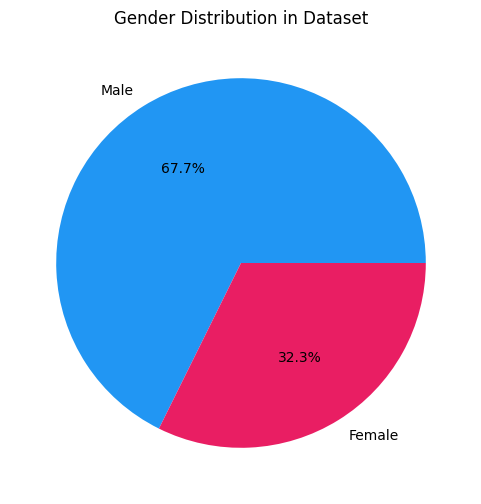

In [33]:
plt.figure(figsize=(6, 6))
gender_counts = df['sex'].value_counts()
labels = ['Male', 'Female']
colors = ['#2196F3', '#E91E63']

plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution in Dataset')
plt.show()

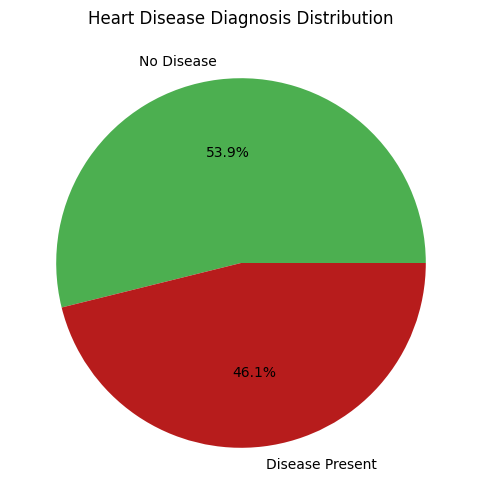

In [34]:
# Pie chart of diagnosis
plt.figure(figsize=(6, 6))
labels = ['No Disease', 'Disease Present']
diagnosis_counts = [sum(df['target'] == 0), sum(df['target'] > 0)]
plt.pie(diagnosis_counts, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#B71C1C'])
plt.title('Heart Disease Diagnosis Distribution')
plt.show()

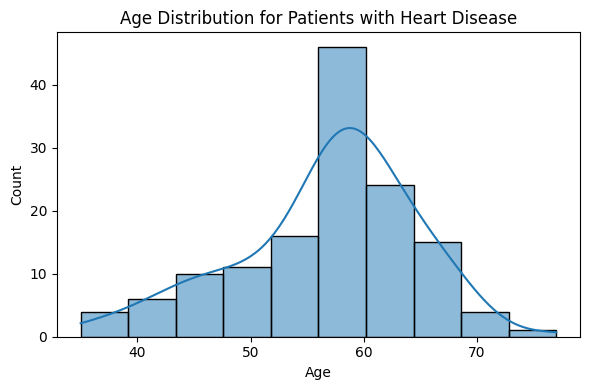

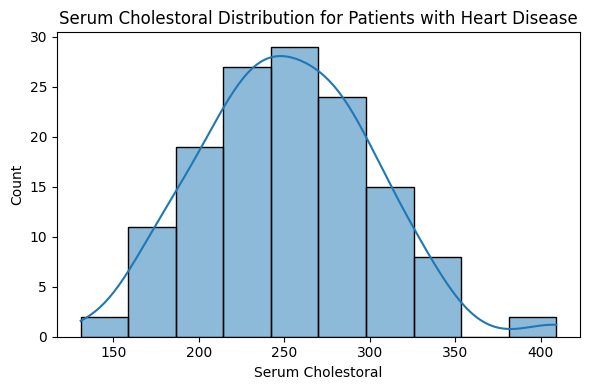

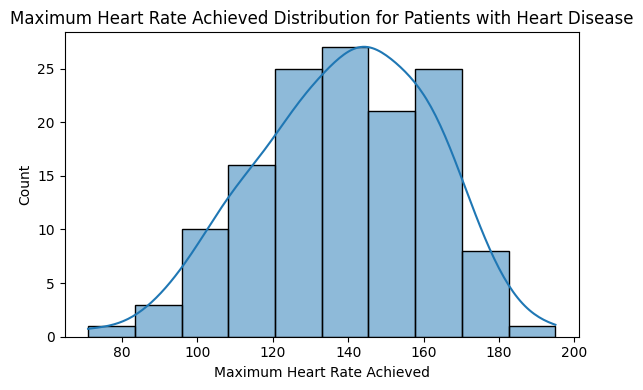

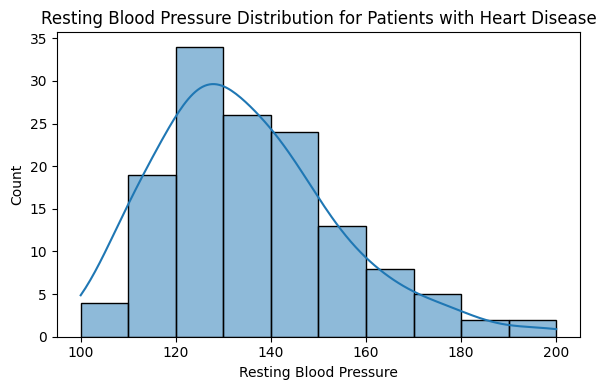

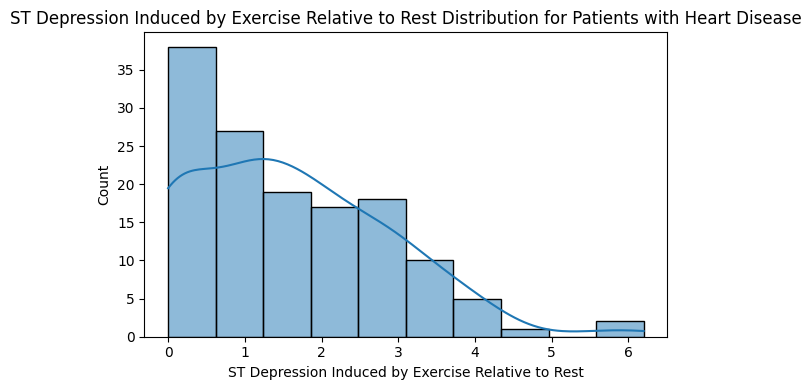

In [37]:
selected_features = ['age', 'chol', 'thalach', 'trestbps', 'oldpeak']

# Filter the DataFrame to only include rows where target > 1
filtered_df = df[df['target'] > 0]

for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(filtered_df[feature], kde=True, bins=10)
    plt.title(f'{fact_names_description[feature]} Distribution for Patients with Heart Disease')
    plt.xlabel(fact_names_description[feature])
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()